In [1]:
import numpy as np
import pandas as pd

In [2]:
# command ref
# new_moviedb_df.iloc[:, 21:].head() ---look at specific columns by numeric equivalent
# new_moviedb_df[['Adventure', 'Comedy']].head() ---look by column name
# new_moviedb_df.columns[20 : 42] ---display column name
# new_moviedb_df.iloc[:, 20:42].columns.values.tolist() ---list column names
# new_moviedb_df.iloc[:, 20:42].applymap(lambda x: True if x == 1 else x)
# new_moviedb_df.groupby('Action', as_index=False).mean()['revenue'] ---group by genre and look at revenue mean
# movie_data_df[movie_data_df.revenue != 0] ---remove 0 field in revenue

In [3]:
movie_data_df = pd.read_csv('tmdb-movies.csv', header=0)
# import data and use row 0 as index

In [4]:
new_moviedb_df =  movie_data_df.join(movie_data_df.pop('genres').str.get_dummies())
# split the genres column to separate columns for ease of data corelation
# source: https://stackoverflow.com/questions/47248727/parsing-csv-file-with-pandas-in-python3

In [5]:
new_moviedb_df.iloc[:, 20 : 42] = new_moviedb_df.iloc[:, 20 : 42].applymap(lambda x: True 
                                                                           if x == 1 
                                                                           else x).applymap(lambda x: False 
                                                                                            if x== 0 
                                                                                            else x)
# Convert 0 and 1 to Boolean for the Genre field
# https://stackoverflow.com/questions/38499747/converting-all-occurrence-of-true-false-to-1-0-in-a-dataframe-with-mixed-datatyp

In [6]:
new_moviedb_df['month'] = pd.DatetimeIndex(new_moviedb_df['release_date']).month

In [7]:
def remove_zero_row(df, row_name):
    """
    Remove the whole row when there is a '0' value in the specified row name
    """
    return df[df[row_name] != 0]

def get_genre_mean(df, group_row, look_at_row):
    """
    Gets the mean of the genre row "look_at_row" from a specified grouped df by "group_row"
    """
    return df.groupby(group_row, as_index=False).mean()[look_at_row].loc[1]
    # loc[1] is meant to get the value only for boolean "True" dataset

In [45]:
# new_moviedb_df_nonzero = new_moviedb_df[new_moviedb_df.revenue != 0]
nonzero_revenue_moviedb_df = remove_zero_row(new_moviedb_df, 'revenue')

In [9]:
nonzero_revenue_moviedb_df.groupby('Action', as_index=False).describe()['revenue']

,count,mean,std,min,25%,50%,75%,max
0,3589.0,7.221415e+07,1.300131e+08,2.0,5867686.0,27379978.0,82150642.0,1.845034e+09
1,1261.0,1.376238e+08,2.231144e+08,3.0,14567883.0,55583804.0,161626121.0,2.781506e+09


In [10]:
# nonzero_revenue_moviedb_df.groupby('Action', as_index=False).mean()['revenue'].loc[1]
get_genre_mean(nonzero_revenue_moviedb_df, 'Action', 'revenue')

137623797.06106263

In [11]:
testdb = nonzero_revenue_moviedb_df.groupby(['Action', 'month'], as_index=False).mean()['revenue']

In [12]:
testdb

0     3.029020e+07
1     5.997648e+07
2     8.100660e+07
3     4.813166e+07
4     8.957962e+07
5     1.216873e+08
6     8.456919e+07
7     4.833451e+07
8     3.831978e+07
9     5.179166e+07
10    1.233807e+08
11    1.039853e+08
12    7.927531e+07
13    6.552098e+07
14    9.325377e+07
15    1.422455e+08
16    2.388073e+08
17    2.095141e+08
18    1.958421e+08
19    8.549925e+07
20    5.989399e+07
21    1.097382e+08
22    1.375468e+08
23    1.725121e+08
Name: revenue, dtype: float64

In [13]:
dataset1 = testdb[0:12]
dataset2 = testdb[12:]


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.tsplot(data=dataset1, ax=ax, color='b')
sns.tsplot(data=dataset2, ax=ax, color='r')


C:\anaconda2\envs\udacity27\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


In [15]:
testdb3 = nonzero_revenue_moviedb_df.groupby(['month'], as_index=False).mean()

In [16]:
testdb3

,month,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,44628.139073,0.826323,1.706683e+07,4.294198e+07,101.579470,289.986755,5.925497,2003.208609,1.918420e+07,...,0.016556,0.182119,0.019868,0.096026,0.178808,0.105960,0.000000,0.311258,0.029801,0.006623
1,2,37813.959752,0.876507,2.449400e+07,6.128107e+07,103.671827,326.873065,6.061300,2002.476780,2.827730e+07,...,0.024768,0.099071,0.027864,0.089783,0.229102,0.080495,0.000000,0.331269,0.015480,0.009288
2,3,41383.682796,1.052386,2.857331e+07,8.439762e+07,105.314516,441.446237,6.073387,2001.086022,3.215140e+07,...,0.013441,0.096774,0.040323,0.096774,0.163978,0.161290,0.000000,0.290323,0.021505,0.010753
3,4,43633.628986,0.888685,2.699062e+07,7.650220e+07,103.892754,390.797101,6.043188,2001.379710,3.105894e+07,...,0.011594,0.130435,0.020290,0.092754,0.179710,0.118841,0.000000,0.301449,0.020290,0.017391
4,5,43239.735135,1.246543,4.009746e+07,1.363645e+08,110.232432,606.637838,6.202162,2001.056757,4.644069e+07,...,0.040541,0.100000,0.027027,0.064865,0.140541,0.137838,0.002703,0.283784,0.029730,0.018919
5,6,35272.951220,1.302764,4.240750e+07,1.503917e+08,109.004878,612.321951,6.171951,1998.009756,5.287567e+07,...,0.019512,0.085366,0.034146,0.060976,0.165854,0.180488,0.000000,0.251220,0.029268,0.019512
6,7,42770.406250,1.200495,3.678257e+07,1.181829e+08,106.091146,565.192708,6.125000,1999.492188,4.368343e+07,...,0.023438,0.098958,0.041667,0.091146,0.166667,0.174479,0.000000,0.296875,0.015625,0.015625
7,8,48636.642691,0.884480,2.345434e+07,5.911315e+07,103.879350,303.645012,5.978422,2001.320186,2.756427e+07,...,0.025522,0.176334,0.051044,0.090487,0.176334,0.129930,0.000000,0.336427,0.016241,0.009281
8,9,57579.062397,0.826104,1.788849e+07,4.225202e+07,108.407225,300.848933,6.228079,2004.376026,2.072234e+07,...,0.031199,0.108374,0.045977,0.083744,0.201970,0.088670,0.000000,0.305419,0.026273,0.009852
9,10,52310.872807,1.033512,2.477026e+07,6.437217e+07,108.192982,407.896930,6.224342,2001.024123,2.958914e+07,...,0.041667,0.168860,0.037281,0.118421,0.173246,0.081140,0.000000,0.313596,0.028509,0.006579


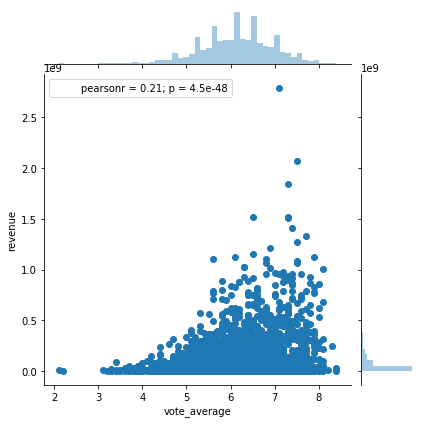

In [17]:
sns.jointplot(x="vote_average", y="revenue", data=nonzero_revenue_moviedb_df)

In [18]:
# sns.set()
# g = sns.lmplot(x="popularity", y="vote_count", hue="revenue",              
#              truncate=True, size=5, data=nonzero_revenue_moviedb_df)

#g.set_axis_labels("popularity", "vote_count")

In [46]:
import calendar
nonzero_revenue_moviedb_df['month'] = nonzero_revenue_moviedb_df['month'].apply(lambda x: calendar.month_abbr[x])

C:\anaconda2\envs\udacity27\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [31]:
nonzero_revenue_moviedb_df['month']

0        Jun
1        May
2        Mar
3        Dec
4        Apr
5        Dec
6        Jun
7        Sep
8        Jun
9        Jun
10       Oct
11       Feb
12       Jan
13       Jul
14       Apr
15       Dec
16       Jan
17       Jul
18       Mar
19       Nov
20       May
21       Jun
22       May
23       Feb
24       Dec
25       Jul
26       Jun
27       Jan
28       Nov
29       Sep
        ... 
10740    Jun
10755    Jul
10756    Jun
10757    Sep
10758    Dec
10759    Oct
10760    Jul
10761    Jul
10762    Dec
10764    Jan
10766    Sep
10770    Oct
10771    Nov
10775    Oct
10777    Apr
10778    Nov
10779    Jun
10780    Dec
10787    Mar
10788    Oct
10791    Jun
10793    Oct
10812    Mar
10817    May
10819    Jul
10822    Jun
10828    Jul
10829    Dec
10835    Dec
10848    Aug
Name: month, Length: 4850, dtype: object

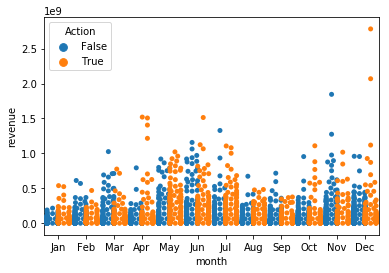

In [39]:
sns.swarmplot(x="month", 
              y="revenue", 
              hue="Action", 
              data=nonzero_revenue_moviedb_df, 
              dodge=True,
              order=["Jan", "Feb", "Mar", "Apr",
                     "May", "Jun", "Jul", "Aug",
                     "Sep", "Oct", "Nov", "Dec"
                    ]
             )

In [ ]:
# sns.pairplot(nonzero_revenue_moviedb_df, hue="month")

In [ ]:
nonzero_revenue_action_df = nonzero_revenue_moviedb_df[nonzero_revenue_moviedb_df['Action']==1]

In [ ]:
nonzero_revenue_action_dfnonzero_revenue_action_df

In [ ]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2)
sns.barplot(x="month", y="revenue", hue="Horror", data=monthly.sort_values(['month', 'Horror']))
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Revenue of Horror Movies per Month")